## Introduction to Pandas

Pandas is a library specifically for data analysis; it is built using NumPy. You will be using Pandas extensively for data manipulation, visualisation, building machine learning models, etc.

## Basics of Pandas

**`Pandas`** has two data structures:
 - Series
 - Dataframe
 
The more commonly used data structure are DataFrames.

## Dataframe

It is a table with rows and columns, with rows having an index each and columns having meaningful names. There are various ways of creating dataframes, for instance, creating them from dictionaries, reading from .txt and .csv files.

### Creating dataframes from dictionaries

If you have data in the form of lists present in Python, then you can create the dataframe directly through dictionaries. The ‘key’ in the dictionary acts as the column name and the ‘values’ stored are the entries under the column. 

In [1]:
# importing libraries for Numpy and Pandas
import numpy as np
import pandas as pd

<h4 style = "color : Sky blue"> Example - 1</h4>  

##### Create a Data Frame cars using raw data stored in a dictionary

In [2]:
cars_per_cap = [809, 731, 588, 18, 200, 70, 45]
country = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
drives_right = [True, False, False, False, True, True, True]

#### First we will create a dictionary from above given lists and then we will create dataframe from dictionary

To create a dataframe from a dictionary, you can run the following command:

**```pd.DataFrame(dictionary_name)```**

You can also provide lists or arrays to create dataframes, but then you will have to specify the column names as shown below.

**```pd.DataFrame(list_or_array_name, columns = ['column_1', 'column_2'])```**

In [3]:
data = {'cars_per_cap':cars_per_cap,'country':country,'drives_right':drives_right}
data

{'cars_per_cap': [809, 731, 588, 18, 200, 70, 45],
 'country': ['United States',
  'Australia',
  'Japan',
  'India',
  'Russia',
  'Morocco',
  'Egypt'],
 'drives_right': [True, False, False, False, True, True, True]}

In [4]:
cars = pd.DataFrame(data)
cars

,cars_per_cap,country,drives_right
0,809,United States,True
1,731,Australia,False
2,588,Japan,False
3,18,India,False
4,200,Russia,True
5,70,Morocco,True
6,45,Egypt,True


In [5]:
cars1 = pd.DataFrame(list(zip(cars_per_cap,country,drives_right)), columns=['cars_per_cap','country','drives_right'])
cars1

,cars_per_cap,country,drives_right
0,809,United States,True
1,731,Australia,False
2,588,Japan,False
3,18,India,False
4,200,Russia,True
5,70,Morocco,True
6,45,Egypt,True


In [6]:
type(cars)

pandas.core.frame.DataFrame

<h4 style = "color : Sky blue"> Example - 2 (Reading data from a file)</h4>  

##### Create a Data Frame by importing cars data from cars.csv

In [7]:
cars = pd.read_csv('cars.csv')
cars.head()

,USCA,US,United States,809,FALSE
0,ASPAC,AUS,Australia,731.0,True
1,ASPAC,JAP,Japan,588.0,True
2,ASPAC,IN,India,18.0,True
3,ASPAC,RU,Russia,200.0,False
4,LATAM,MOR,Morocco,70.0,False


<h4 style = "color : Sky blue"> Example - 3 (Column headers)</h4>  

##### Read file - skip header

In [8]:
cars = pd.read_csv('cars.csv', header=None)
cars

,0,1,2,3,4
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


##### Assign Headers

In [9]:
# Returns an array of headers
cars.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [10]:
#Rename Headers
cars.columns = ['country code', 'region', 'country', 'cars_per_cap', 'drive_right']

In [11]:
cars.head()

,country code,region,country,cars_per_cap,drive_right
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False


#### Pandas provides the flexibility to load data from various sources and has different commands for each of them.

https://pandas.pydata.org/pandas-docs/stable/reference/io.html

The most common files that you will work with are csv files. You can use the following command to load data into a dataframe from a csv file:

**```pd.read_csv(filepath, sep=',', header='infer')```***

You can specify the following details:
 
 - separator (by default ‘,’)
 - header (takes the top row by default, if not specified)
 - names (list of column name)

## Pandas - Rows and Columns

An important concept in Pandas dataframes is that of the row and column indices. By default, each row is assigned indices starting from 0, which are represented to the left of the dataframe. For columns, the first row in the file (csv, text, etc.) is taken as the column header. If a header is not provided (header = none), then the case is similar to that of row indices (which start from 0).

<h4 style = "color : Sky blue"> Example - 4 (Row index/names) </h4>  

##### Read file - skip header and assign first column as index.

In [12]:
# index is returned by 
cars.index

RangeIndex(start=0, stop=8, step=1)

#### Read file and set 1st column as index

**```pd.read_csv(filepath, index_col = column_number)```**

In [13]:
cars = pd.read_csv('cars.csv', header=None, index_col=[0])

In [14]:
cars

,1,2,3,4
0,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


#### set the column name

In [15]:
cars.columns = ['region', 'country', 'cars_per_cap', 'drive_right']
cars

,region,country,cars_per_cap,drive_right
0,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


#### Now print the new index

In [16]:
cars.index

Index(['USCA', 'ASPAC', 'ASPAC', 'ASPAC', 'ASPAC', 'LATAM', 'AFR', 'EUR'], dtype='object', name=0)

#### Rename the newly created Index Name

In [17]:
cars.index.name = 'country_code'

In [18]:
cars

,region,country,cars_per_cap,drive_right
country_code,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


#### Delete the index name

In [19]:
cars.index.name = None

In [20]:
cars

,region,country,cars_per_cap,drive_right
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


##### Set Hierarchical index

It is also possible to create a multilevel indexing for your dataframe; this is known as **hierarchical indexing**.

In [21]:
cars = pd.read_csv('cars.csv', header=None)
cars.columns = ['country_code', 'region', 'country', 'cars_per_cap', 'drive_right']

cars.set_index(['region','country_code'], inplace=True)
cars

,,country,cars_per_cap,drive_right
region,country_code,,,
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


<h4 style = "color : Sky blue"> Example - 5 (Write Data Frame to file) </h4>  

##### Write cars dataframe to cars_to_csv.csv file (just opposite of reading csv file)

In [22]:
cars.to_csv('cars_to_csv.csv')

## Describing Data

<h2 style = "color : Brown">Case Study - Sales Data </h2>

**Note:** ``index_col`` only will create a multi-index DataFrame, not sort it. If you want to sort it you will have to use the ``sort_index()`` method. Example code:

```rating = pd.read_csv("rating.csv", header = 0, index_col = [2,1])```

```rating.sort_index()```

In [23]:
# import library for plotting
import matplotlib.pyplot as plt

##### Sales and Profit data is read in dataframe "sales"

In [24]:
sales = pd.read_excel('sales.xlsx')
sales

,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,-12901.51,78476.06
1,Africa,Southern Africa,85,11768.58,51319.50
2,Africa,North Africa,182,21643.08,86698.89
3,Africa,Eastern Africa,110,8013.04,44182.60
4,Africa,Central Africa,103,15606.30,61689.99
5,Asia Pacific,Western Asia,382,-16766.90,124312.24
6,Asia Pacific,Southern Asia,469,67998.76,351806.60
7,Asia Pacific,Southeastern Asia,533,20948.84,329751.38
8,Asia Pacific,Oceania,646,54734.02,408002.98
9,Asia Pacific,Eastern Asia,414,72805.10,315390.77


### Read file and set 1st two columns as index

In [25]:
sales = pd.read_excel('sales.xlsx', index_col=[0,1])
sales

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77
             Central Asia                 37  -2649.76    8190.74
Europe       Western Europe              964  82091.27  656637.14
             Southern Europe             338  18911.49  215703.93
             Northern Europe             367  43237.44  252969.09
             Eastern Europe              241  25050.69  108258.93
LATAM        South America               496  12377.59  210710.49
             Central America             930  74679.54  461670.28
             Caribbean                   288  13529.59  116333.05
USCA         Western US                  490  44303.65  251991.83
             Southern US                 255  19991.83  148771.91
             Eastern US                  443  47462.04  264973.98
             Central US                  356  33697.43  170416.31
             Canada                       49   7246.62   26298.81

### Hierarchical Indexing

#### Description

You are provided with the dataset of a company which has offices across three cities - Mumbai, Bangalore and New Delhi. The dataset contains the rating (out of 5) of all the employees from different departments (Finance, HR, Marketing and Sales). 

Create a hierarchical index based on two columns: Office and Department

Print the first 5 rows as the output. Refer to the image below for your reference.

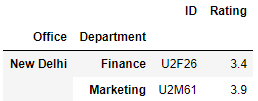

**Note**: You should not sort or modify values in other columns of the dataframe. Use sort_index(inplace=True) to club the same locations together.



In [26]:
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/NMgEjwkAEGGQZBoNYGr9Ld7w0/rating.csv', 
                 index_col = [2,1])
df.sort_index(inplace=True)
print(df.head())

                         ID  Rating
Office    Department               
Bangalore Finance     U2F53     2.7
          Finance     U1F53     3.7
          Finance     U1F28     3.2
          Finance     U1F15     3.3
          Finance     U1F14     2.9


<h4 style = "color : Sky blue"> Example - 1</h4>  

### Display first 3 and last 3 rows of the sales dataframe

In [27]:
sales.head()  # Default return first 5 rows

No_of_Orders    Profit     Sales
Market Region                                           
Africa Western Africa            251 -12901.51  78476.06
       Southern Africa            85  11768.58  51319.50
       North Africa              182  21643.08  86698.89
       Eastern Africa            110   8013.04  44182.60
       Central Africa            103  15606.30  61689.99

In [28]:
sales.head(3)

No_of_Orders    Profit     Sales
Market Region                                           
Africa Western Africa            251 -12901.51  78476.06
       Southern Africa            85  11768.58  51319.50
       North Africa              182  21643.08  86698.89

In [29]:
sales.tail()  # Default return last 5 rows

No_of_Orders    Profit      Sales
Market Region                                        
USCA   Western US            490  44303.65  251991.83
       Southern US           255  19991.83  148771.91
       Eastern US            443  47462.04  264973.98
       Central US            356  33697.43  170416.31
       Canada                 49   7246.62   26298.81

In [30]:
sales.tail(3)

No_of_Orders    Profit      Sales
Market Region                                       
USCA   Eastern US           443  47462.04  264973.98
       Central US           356  33697.43  170416.31
       Canada                49   7246.62   26298.81

<h4 style = "color : Sky blue"> Example - 2</h4>  

##### Display the information about the data stored in data frame

In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada')
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_of_Orders  23 non-null     int64  
 1   Profit        23 non-null     float64
 2   Sales         23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB


##### Display the statistical information about the data in dataframe

In [32]:
sales.describe()

,No_of_Orders,Profit,Sales
count,23.000000,23.000000,23.000000
mean,366.478261,28859.944783,206285.108696
std,246.590361,27701.193773,160589.886606
min,37.000000,-16766.900000,8190.740000
25%,211.500000,12073.085000,82587.475000
50%,356.000000,20948.840000,170416.310000
75%,479.500000,45882.845000,290182.375000
max,964.000000,82091.270000,656637.140000


### You learnt about two commands which give statistical information as well:

**``dataframe.info()``**: This method prints information about the dataframe, which includes the index data type and column data types, the count of non-null values and the memory used. 

**``dataframe.describe()``**: This function produces descriptive statistics for the dataframe, that is, the central tendency (mean, median, min, max, etc.), dispersion, etc. It analyses the data and generates output for both numeric and non-numeric data types accordingly. 

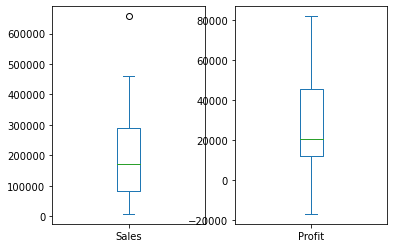

In [33]:
sales[['Sales','Profit']].plot(kind='box', subplots = True)
plt.show()

In [34]:
sales['Profit']

Market        Region           
Africa        Western Africa      -12901.51
              Southern Africa      11768.58
              North Africa         21643.08
              Eastern Africa        8013.04
              Central Africa       15606.30
Asia Pacific  Western Asia        -16766.90
              Southern Asia        67998.76
              Southeastern Asia    20948.84
              Oceania              54734.02
              Eastern Asia         72805.10
              Central Asia         -2649.76
Europe        Western Europe       82091.27
              Southern Europe      18911.49
              Northern Europe      43237.44
              Eastern Europe       25050.69
LATAM         South America        12377.59
              Central America      74679.54
              Caribbean            13529.59
USCA          Western US           44303.65
              Southern US          19991.83
              Eastern US           47462.04
              Central US           33697.43


## Indexing and Slicing

There are multiple ways to select rows and columns from a dataframe or series. In this segment, you will learn how to:

 - Select rows from a dataframe
 - Select columns from a dataframe
 - Select subsets of dataframes
 
**``Selection of rows``** in dataframes is similar to the indexing that you saw in NumPy arrays. The syntax **``df[start_index:end_index]``** will subset the rows according to the start and end indices. 

### Displays pandas float values in 2 decimals

In [35]:
pd.options.display.float_format = '{:,.2f}'.format

In [36]:
sales = pd.read_excel('sales.xlsx')
sales

,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,"-12,901.51","78,476.06"
1,Africa,Southern Africa,85,"11,768.58","51,319.50"
2,Africa,North Africa,182,"21,643.08","86,698.89"
3,Africa,Eastern Africa,110,"8,013.04","44,182.60"
4,Africa,Central Africa,103,"15,606.30","61,689.99"
5,Asia Pacific,Western Asia,382,"-16,766.90","124,312.24"
6,Asia Pacific,Southern Asia,469,"67,998.76","351,806.60"
7,Asia Pacific,Southeastern Asia,533,"20,948.84","329,751.38"
8,Asia Pacific,Oceania,646,"54,734.02","408,002.98"
9,Asia Pacific,Eastern Asia,414,"72,805.10","315,390.77"


##### Sales and Profit data is read in dataframe "sales"

##### Read file and set 2nd column as index

In [37]:
sales = pd.read_excel('sales.xlsx', index_col=[1])
sales

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51","78,476.06"
Southern Africa,Africa,85,"11,768.58","51,319.50"
North Africa,Africa,182,"21,643.08","86,698.89"
Eastern Africa,Africa,110,"8,013.04","44,182.60"
Central Africa,Africa,103,"15,606.30","61,689.99"
Western Asia,Asia Pacific,382,"-16,766.90","124,312.24"
Southern Asia,Asia Pacific,469,"67,998.76","351,806.60"
Southeastern Asia,Asia Pacific,533,"20,948.84","329,751.38"
Oceania,Asia Pacific,646,"54,734.02","408,002.98"


<h4 style = "color : Sky blue"> Example - 1 (Column Indexing)</h4>  

##### Display Sales Column

#### each row with only Sales column

We can select one or more columns from a dataframe using the following commands:

 - **df['column'] or df.column**: It returns a series
 - **df[['col_x', 'col_y']]**: It returns a dataframe

In [38]:
sales['Sales']

Region
Western Africa       78,476.06
Southern Africa      51,319.50
North Africa         86,698.89
Eastern Africa       44,182.60
Central Africa       61,689.99
Western Asia        124,312.24
Southern Asia       351,806.60
Southeastern Asia   329,751.38
Oceania             408,002.98
Eastern Asia        315,390.77
Central Asia          8,190.74
Western Europe      656,637.14
Southern Europe     215,703.93
Northern Europe     252,969.09
Eastern Europe      108,258.93
South America       210,710.49
Central America     461,670.28
Caribbean           116,333.05
Western US          251,991.83
Southern US         148,771.91
Eastern US          264,973.98
Central US          170,416.31
Canada               26,298.81
Name: Sales, dtype: float64

In [39]:
sales.Sales

Region
Western Africa       78,476.06
Southern Africa      51,319.50
North Africa         86,698.89
Eastern Africa       44,182.60
Central Africa       61,689.99
Western Asia        124,312.24
Southern Asia       351,806.60
Southeastern Asia   329,751.38
Oceania             408,002.98
Eastern Asia        315,390.77
Central Asia          8,190.74
Western Europe      656,637.14
Southern Europe     215,703.93
Northern Europe     252,969.09
Eastern Europe      108,258.93
South America       210,710.49
Central America     461,670.28
Caribbean           116,333.05
Western US          251,991.83
Southern US         148,771.91
Eastern US          264,973.98
Central US          170,416.31
Canada               26,298.81
Name: Sales, dtype: float64

In [40]:
type(sales['Sales'])

pandas.core.series.Series

##### Display Sales and Profit Column together

In [41]:
sales[['Sales','Profit']]

,Sales,Profit
Region,,
Western Africa,"78,476.06","-12,901.51"
Southern Africa,"51,319.50","11,768.58"
North Africa,"86,698.89","21,643.08"
Eastern Africa,"44,182.60","8,013.04"
Central Africa,"61,689.99","15,606.30"
Western Asia,"124,312.24","-16,766.90"
Southern Asia,"351,806.60","67,998.76"
Southeastern Asia,"329,751.38","20,948.84"
Oceania,"408,002.98","54,734.02"


In [42]:
type(sales[['Sales','Profit']])

pandas.core.frame.DataFrame

### Pandas series data type:

To visualise pandas series easily, it can be thought of as a one-dimensional (1D) NumPy array with a label and an index attached to it. Also, unlike NumPy arrays, they can contain non-numeric data (characters, dates, time, booleans, etc.). Usually, you will work with Series only as part of dataframes. 

You could create a Pandas series from an array-like object using the following command:

``pd.Series(data, dtype)``

<h4 style = "color : Sky blue"> Example - 2 (Row Indexing)</h4>  

##### Display data for "Southern Asia"

loc accessor takes row index and column index

In [43]:
sales.loc['Southern Asia']  # sales.loc[row_index]

Market          Asia Pacific
No_of_Orders             469
Profit             67,998.76
Sales             351,806.60
Name: Southern Asia, dtype: object

##### Display Sales data for "Southern Asia"

In [44]:
sales.loc['Southern Asia', 'Sales']  # sales.loc[row_index, column_index]

351806.6

##### Display data for "Southern Asia"

iloc accessor takes row number and column number

In [45]:
sales.iloc[6]  # sales.loc[row_number]

Market          Asia Pacific
No_of_Orders             469
Profit             67,998.76
Sales             351,806.60
Name: Southern Asia, dtype: object

In [46]:
sales.iloc[6, 3]  # sales.loc[row_number, column_number]

351806.6

### You can use the loc method to extract rows and columns from a dataframe based on the following labels:

``dataframe.loc[[list_of_row_labels], [list_of_column_labels]]``

In [47]:
sales.loc[['Western Africa','Southern Africa'], ['Market','Profit','Sales']]

,Market,Profit,Sales
Region,,,
Western Africa,Africa,"-12,901.51","78,476.06"
Southern Africa,Africa,"11,768.58","51,319.50"


In [48]:
sales.iloc[0:2,[0,2,3]]

,Market,Profit,Sales
Region,,,
Western Africa,Africa,"-12,901.51","78,476.06"
Southern Africa,Africa,"11,768.58","51,319.50"


This is called ``label-based indexing`` over dataframes. Now, you may face some challenges while dealing with the labels. As a solution, you might want to fetch data based on the row or column number.

##### As you learnt in the video, another method for indexing a dataframe is the iloc method, which uses the row or column number instead of labels.

``dataframe.iloc[rows, columns]``

Since positions are used instead of labels to extract values from the dataframe, the process is called ``position-based indexing``. With these two methods, you can easily extract the required entries from a dataframe based on their labels or positions. The same set of commands, loc and iloc , can be used to slice the data as well. 

<h4 style = "color : Sky blue"> Example - 3 (Slicing)</h4>  

##### Display all the rows for Market, Sales and Profit

In [49]:
sales.loc[:,['Market','Sales','Profit']]

,Market,Sales,Profit
Region,,,
Western Africa,Africa,"78,476.06","-12,901.51"
Southern Africa,Africa,"51,319.50","11,768.58"
North Africa,Africa,"86,698.89","21,643.08"
Eastern Africa,Africa,"44,182.60","8,013.04"
Central Africa,Africa,"61,689.99","15,606.30"
Western Asia,Asia Pacific,"124,312.24","-16,766.90"
Southern Asia,Asia Pacific,"351,806.60","67,998.76"
Southeastern Asia,Asia Pacific,"329,751.38","20,948.84"
Oceania,Asia Pacific,"408,002.98","54,734.02"


In [50]:
sales.loc[:,:]  # for Entire rows and entire columns

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51","78,476.06"
Southern Africa,Africa,85,"11,768.58","51,319.50"
North Africa,Africa,182,"21,643.08","86,698.89"
Eastern Africa,Africa,110,"8,013.04","44,182.60"
Central Africa,Africa,103,"15,606.30","61,689.99"
Western Asia,Asia Pacific,382,"-16,766.90","124,312.24"
Southern Asia,Asia Pacific,469,"67,998.76","351,806.60"
Southeastern Asia,Asia Pacific,533,"20,948.84","329,751.38"
Oceania,Asia Pacific,646,"54,734.02","408,002.98"


In [51]:
sales.iloc[:,[0,3,2]]

,Market,Sales,Profit
Region,,,
Western Africa,Africa,"78,476.06","-12,901.51"
Southern Africa,Africa,"51,319.50","11,768.58"
North Africa,Africa,"86,698.89","21,643.08"
Eastern Africa,Africa,"44,182.60","8,013.04"
Central Africa,Africa,"61,689.99","15,606.30"
Western Asia,Asia Pacific,"124,312.24","-16,766.90"
Southern Asia,Asia Pacific,"351,806.60","67,998.76"
Southeastern Asia,Asia Pacific,"329,751.38","20,948.84"
Oceania,Asia Pacific,"408,002.98","54,734.02"


##### Display data for Western Africa Southern Africa and North Africa for all columns

In [52]:
sales.loc[['Western Africa','Southern Africa', 'North Africa'], :]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51","78,476.06"
Southern Africa,Africa,85,"11,768.58","51,319.50"
North Africa,Africa,182,"21,643.08","86,698.89"


In [53]:
sales.iloc[0:3,:]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51","78,476.06"
Southern Africa,Africa,85,"11,768.58","51,319.50"
North Africa,Africa,182,"21,643.08","86,698.89"


## Subsetting rows based on conditions

Often, we want to select rows that meet some given conditions. For example, we may want to select all orders where ``Sales > 3,000``, or all orders where ``2,000 < Sales < 3,000`` and ``Profit < 100``. Arguably, the best way to perform these operations is to use ``df.loc[]``, since ``df.iloc[]`` would require we to remember the integer column indices, which is tedious. Let’s start first with one condition to filter the elements in the dataframe.

You already know the basic conditional operators like "<" or ">". There are a couple of other functions which might come in really handy while handling real-life datasets.  These are **isin()** and **isna()**. 

**``isin()``** : Similar to the membership operator in lists, this function can check if the given element "is in" the collection of elements provided. 

**``isna()``** : It checks whether the given element is null/empty. 

<h4 style = "color : Sky blue"> Example - 4 (Filtering)</h4>  

##### Display Markets with Sales >300000

In [54]:
sales[sales['Sales'] > 300000]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Southern Asia,Asia Pacific,469,"67,998.76","351,806.60"
Southeastern Asia,Asia Pacific,533,"20,948.84","329,751.38"
Oceania,Asia Pacific,646,"54,734.02","408,002.98"
Eastern Asia,Asia Pacific,414,"72,805.10","315,390.77"
Western Europe,Europe,964,"82,091.27","656,637.14"
Central America,LATAM,930,"74,679.54","461,670.28"


##### Display the LATAM and Eruopean countries with sales > 250000

In [55]:
sales[(sales['Sales'] > 250000) & (sales['Market'].isin(['LATAM','Europe']))]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,"82,091.27","656,637.14"
Northern Europe,Europe,367,"43,237.44","252,969.09"
Central America,LATAM,930,"74,679.54","461,670.28"


### Optional Examples 

The examples given below are good to know but not essential to achieve the objective of this session. You can go through them at your own pace. 

<h4 style = "color : Sky blue"> Example - 5 (Transformation)</h4>  

We can use pandas to transform columns into more readable forms. For instance, a sales value of **``34876$``** per month is difficult to read. It can be simply rounded to **``35k``**, that way it becomes easy to read. Transformation is not a very widely used technique, you can listen to the video linked here to learn more about it. 

https://youtube.com/playlist?list=PLtC_lnP-hMN7_Rl8XivHQJyEvjREiDjyK

##### Replace the sales values in the form of thousands

Context: Some time you might want to modify columns to make them more readable. For instance, the sales column in the given data set has six digits, followed by two decimal places. You might want to make it more readable. You can convert the actual sales number to a number in thousands and make it a round figure. 

eg. 300000 - 300K

You can use the .floordiv function to achieve the transformation explained above. 

You can read more about the **``floordiv``** method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.floordiv.html). 

In [56]:
sales.Sales = sales.Sales.floordiv(1000)

sales.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51",78.00
Southern Africa,Africa,85,"11,768.58",51.00
North Africa,Africa,182,"21,643.08",86.00
Eastern Africa,Africa,110,"8,013.04",44.00
Central Africa,Africa,103,"15,606.30",61.00


#### Rename the column name 

In [73]:
sales.rename(columns={'Sales' : 'Sales in Thousand'}, inplace=True)
sales

,Market,No_of_Orders,Profit,Sales in Thousand
Region,,,,
Western Africa,Africa,251,"-12,901.51",78.00
Southern Africa,Africa,85,"11,768.58",51.00
North Africa,Africa,182,"21,643.08",86.00
Eastern Africa,Africa,110,"8,013.04",44.00
Central Africa,Africa,103,"15,606.30",61.00
Western Asia,Asia Pacific,382,"-16,766.90",124.00
Southern Asia,Asia Pacific,469,"67,998.76",351.00
Southeastern Asia,Asia Pacific,533,"20,948.84",329.00
Oceania,Asia Pacific,646,"54,734.02",408.00


##### Replace values in Profit percent of total {add new column}

In [78]:
total_sum = sales.Profit.sum()
sales['Proffit % of Total'] = sales.Profit.apply(lambda x : (x/total_sum)*100)
sales.head()

,Market,No_of_Orders,Profit,Sales in Thousand,Proffit % of Total
Region,,,,,
Western Africa,Africa,251,"-12,901.51",78.00,-1.94
Southern Africa,Africa,85,"11,768.58",51.00,1.77
North Africa,Africa,182,"21,643.08",86.00,3.26
Eastern Africa,Africa,110,"8,013.04",44.00,1.21
Central Africa,Africa,103,"15,606.30",61.00,2.35


##### Replace negative Profits with NAN

In [79]:
sales.loc[sales['Profit']<0, 'Profit'] = np.nan
sales

,Market,No_of_Orders,Profit,Sales in Thousand,Proffit % of Total
Region,,,,,
Western Africa,Africa,251,NaN,78.00,-1.94
Southern Africa,Africa,85,"11,768.58",51.00,1.77
North Africa,Africa,182,"21,643.08",86.00,3.26
Eastern Africa,Africa,110,"8,013.04",44.00,1.21
Central Africa,Africa,103,"15,606.30",61.00,2.35
Western Asia,Asia Pacific,382,NaN,124.00,-2.53
Southern Asia,Asia Pacific,469,"67,998.76",351.00,10.24
Southeastern Asia,Asia Pacific,533,"20,948.84",329.00,3.16
Oceania,Asia Pacific,646,"54,734.02",408.00,8.25


### Program for leap year

In [80]:
def is_leap(year):
    leap = False
    # Write your logic here
    if ((year%4 == 0) & (year%100 == 0) & (year%400 == 0)):
        leap = True
    return leap

In [81]:
year = int(input())
print(is_leap(year))

1996
False


### Step 1: Load or create dataframe having a date column

In [57]:
data = pd.DataFrame({'AdmissionDate': ['2021-01-25','2021-01-22','2021-01-20',
                        '2021-01-18','2021-01-22','2021-01-17','2021-01-21'],
                     'StudentID': [7,5,3,2,6,1,4],
                     'Name': ['Ram','Shyam','Mohan','Sohan','Lucky','Abhinav','Danny'],
                     'Stream':['CSE','ECE','Civil','Mechanical','CSE','IT','EEE']
                   })

In [58]:
data

,AdmissionDate,StudentID,Name,Stream
0,2021-01-25,7,Ram,CSE
1,2021-01-22,5,Shyam,ECE
2,2021-01-20,3,Mohan,Civil
3,2021-01-18,2,Sohan,Mechanical
4,2021-01-22,6,Lucky,CSE
5,2021-01-17,1,Abhinav,IT
6,2021-01-21,4,Danny,EEE


### Step 2: Converting string data type into datetime object.

When we read the dataset the values stored inside the  ``‘AdmissionDate’``  column are treated as string data type by default. So, we need to convert this string object to datetime object, for that we will be using the ``.to_datetime()`` method provided by Pandas that can be done as: 

In [59]:
# checking datatype
print(type(data.AdmissionDate[0]))

<class 'str'>


In [60]:
# convert to date
data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])

In [61]:
# checking datatype
print(type(data.AdmissionDate[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [62]:
data.sort_values(by='AdmissionDate', inplace=True)
data

,AdmissionDate,StudentID,Name,Stream
5,2021-01-17,1,Abhinav,IT
3,2021-01-18,2,Sohan,Mechanical
2,2021-01-20,3,Mohan,Civil
6,2021-01-21,4,Danny,EEE
1,2021-01-22,5,Shyam,ECE
4,2021-01-22,6,Lucky,CSE
0,2021-01-25,7,Ram,CSE


In [63]:
inputDateList = ['06-2014', '08-2020', '04-2003', '04-2005', '10-2002', '12-2021']

In [64]:
from datetime import datetime

# sorting the input list by formatting each date using the strptime() function
inputDateList.sort(key=lambda date: datetime.strptime(date, "%m-%Y"))

inputDateList

['10-2002', '04-2003', '04-2005', '06-2014', '08-2020', '12-2021']

In [65]:
df = pd.DataFrame({'Date':['Oct20','Nov19','Jan19','Sep20','Dec20']})

In [66]:
print (pd.to_datetime(df['Date'], format='%b%y'))

0   2020-10-01
1   2019-11-01
2   2019-01-01
3   2020-09-01
4   2020-12-01
Name: Date, dtype: datetime64[ns]


In [67]:
df = df.iloc[pd.to_datetime(df['Date'], format='%b%y').argsort()]
df

,Date
2,Jan19
1,Nov19
3,Sep20
0,Oct20
4,Dec20


#### Link of datetime format

https://docs.python.org/3/library/datetime.html

#### dataframe sort on the basis of categorical variables

In [68]:
data

,AdmissionDate,StudentID,Name,Stream
5,2021-01-17,1,Abhinav,IT
3,2021-01-18,2,Sohan,Mechanical
2,2021-01-20,3,Mohan,Civil
6,2021-01-21,4,Danny,EEE
1,2021-01-22,5,Shyam,ECE
4,2021-01-22,6,Lucky,CSE
0,2021-01-25,7,Ram,CSE


In [69]:
data.sort_values(by='Name', inplace=True)

In [70]:
data

,AdmissionDate,StudentID,Name,Stream
5,2021-01-17,1,Abhinav,IT
6,2021-01-21,4,Danny,EEE
4,2021-01-22,6,Lucky,CSE
2,2021-01-20,3,Mohan,Civil
0,2021-01-25,7,Ram,CSE
1,2021-01-22,5,Shyam,ECE
3,2021-01-18,2,Sohan,Mechanical


#### dataframe sort on the basis of numeric variables

In [71]:
data.sort_values(by='StudentID', inplace=True)
data

,AdmissionDate,StudentID,Name,Stream
5,2021-01-17,1,Abhinav,IT
3,2021-01-18,2,Sohan,Mechanical
2,2021-01-20,3,Mohan,Civil
6,2021-01-21,4,Danny,EEE
1,2021-01-22,5,Shyam,ECE
4,2021-01-22,6,Lucky,CSE
0,2021-01-25,7,Ram,CSE


In [72]:
data = data.iloc[pd.to_datetime(data['AdmissionDate'], format='%Y-%m-%d').argsort()]
data

,AdmissionDate,StudentID,Name,Stream
5,2021-01-17,1,Abhinav,IT
3,2021-01-18,2,Sohan,Mechanical
2,2021-01-20,3,Mohan,Civil
6,2021-01-21,4,Danny,EEE
1,2021-01-22,5,Shyam,ECE
4,2021-01-22,6,Lucky,CSE
0,2021-01-25,7,Ram,CSE


<h2 style = "color : Brown"> Operations on Pandas</h2>

This notebook will cover the following topics: 
* Filtering dataframes 
    * Single and multiple conditions
* Creating new columns
* Lambda functions 
* Group by and aggregate functions
* Pivot data
* Merging data frames
    * Joins and concatenations
    
<h4 style = "color : Sky blue"> Preparatory steps</h4>  

##### Background

An FMCG company P&J found that the sales of their best selling items are affected by the weather and rainfall trend. For example, the sale of tea increases when it rains, sunscreen is sold on the days when it is least likely to rain, and the sky is clear. They would like to check whether the weather patterns play a vital role in the sale of certain items. Hence as initial experimentation, they would like you to forecast the weather trend in the upcoming days. The target region for this activity is Australia; accordingly, this exercise will be based on analysing and cleaning the weather data from the Australian region available on public platforms.  

##### Read the data into a dataframe

In [82]:
weatherdata = pd.read_csv('weatherdata.csv')

In [84]:
weatherdata.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00


##### Data Dictionary 

1. Date: The date on which the recording was taken
2. Location: The location of the recording
3. MinTemp: Minimum temperature on the day of the recording (in C)
4. MaxTemp: Maximum temperature in the day of the recording (in C)
5. Rainfall: Rainfall in mm
6. Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine: The number of hours of bright sunshine in the day.
8. WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight

<h4 style = "color : Sky blue"> Example 1.1: Filtering dataframes</h4>

Find the days which had sunshine for more than 4 hours. These days will have increased sales of sunscreen. 

In [85]:
weatherdata['Sunshine'] > 4

0         False
1         False
2         False
3         False
4         False
          ...  
142188    False
142189    False
142190    False
142191    False
142192    False
Name: Sunshine, Length: 142193, dtype: bool

In [86]:
weatherdata[weatherdata['Sunshine'] > 4]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
5939,2009-01-01,Cobar,17.90,35.20,0.00,12.00,12.30,SSW,48.00
5940,2009-01-02,Cobar,18.40,28.90,0.00,14.80,13.00,S,37.00
5941,2009-01-03,Cobar,15.50,34.10,0.00,12.60,13.30,SE,30.00
5942,2009-01-04,Cobar,19.40,37.60,0.00,10.80,10.60,NNE,46.00
5943,2009-01-05,Cobar,21.90,38.40,0.00,11.40,12.20,WNW,31.00
...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.30,33.40,0.00,6.00,11.00,ENE,35.00
139109,2017-06-21,Darwin,21.20,32.60,0.00,7.60,8.60,E,37.00
139110,2017-06-22,Darwin,20.70,32.80,0.00,5.60,11.00,E,33.00
139111,2017-06-23,Darwin,19.50,31.80,0.00,6.20,10.60,ESE,26.00


**Note:** High sunshine corresponds to low rainfall. 

<h4 style = "color : Sky blue"> Example 1.2: Filtering dataframes</h4>

The cold drink sales will most likely increase on the days which have high sunshine(>5) and high max temperature(>35). Use the filter operation to filter out these days

In [87]:
weatherdata[(weatherdata['Sunshine'] > 5) & (weatherdata['MaxTemp'] > 35)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
5939,2009-01-01,Cobar,17.90,35.20,0.00,12.00,12.30,SSW,48.00
5942,2009-01-04,Cobar,19.40,37.60,0.00,10.80,10.60,NNE,46.00
5943,2009-01-05,Cobar,21.90,38.40,0.00,11.40,12.20,WNW,31.00
5944,2009-01-06,Cobar,24.20,41.00,0.00,11.20,8.40,WNW,35.00
5948,2009-01-10,Cobar,19.00,35.50,0.00,12.00,12.30,ENE,48.00
...,...,...,...,...,...,...,...,...,...
138862,2016-10-17,Darwin,25.10,35.20,0.00,7.40,11.50,NNE,39.00
138879,2016-11-03,Darwin,24.40,35.50,0.00,7.80,9.90,NW,35.00
138892,2016-11-16,Darwin,25.70,35.20,0.00,5.40,11.30,NW,26.00
138905,2016-11-29,Darwin,25.80,35.10,0.80,4.80,6.40,SSE,46.00


**Note:** The construction of the filter condition, it has individual filter conditions separated in parenthesis

<h4 style = "color : Sky blue"> Example 2.1: Creating new columns</h4>
    
If you noticed the filtering done in the earlier examples did not give precise information about the days, the data column simply has the dates. The date column can be split into the year, month and day of the month. 

**Special module of pandas** The "DatetimeIndex" is a particular module which has the capabilities to extract a day, month and year form the date. 

In [88]:
pd.DatetimeIndex(weatherdata['Date'])

DatetimeIndex(['2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04',
               '2008-12-05', '2008-12-06', '2008-12-07', '2008-12-08',
               '2008-12-09', '2008-12-10',
               ...
               '2017-06-15', '2017-06-16', '2017-06-17', '2017-06-18',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-24'],
              dtype='datetime64[ns]', name='Date', length=142193, freq=None)

In [89]:
weatherdata['year'] = pd.DatetimeIndex(weatherdata['Date']).year

In [90]:
weatherdata['month'] = pd.DatetimeIndex(weatherdata['Date']).month

In [91]:
weatherdata['dayOfmonth'] = pd.DatetimeIndex(weatherdata['Date']).day

In [92]:
weatherdata.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,year,month,dayOfmonth
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,2008,12,1
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,2008,12,2
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,2008,12,3
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,2008,12,4
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,2008,12,5


<h4 style = "color : Sky blue"> Example 2.2: Creating new columns</h4>

The temperature given is in Celcius, convert it in Fahrenheit and store it in a new column for it. 

In [93]:
weatherdata['MaxTemp_F'] = weatherdata['MaxTemp'] * (9/5) + 32
weatherdata.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,year,month,dayOfmonth,MaxTemp_F
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,2008,12,1,73.22
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,2008,12,2,77.18
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,2008,12,3,78.26
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,2008,12,4,82.40
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,2008,12,5,90.14


<h4 style = "color : Sky blue"> Example 3.1: Lambda Functions</h4>

Let's create a new column which highlights the days which have rainfall more than 50 mm as rainy days and the rest are not.

In [94]:
weatherdata.Rainfall

0        0.60
1        0.00
2        0.00
3        0.00
4        1.00
         ... 
142188   0.00
142189   0.00
142190   0.00
142191   0.00
142192   0.00
Name: Rainfall, Length: 142193, dtype: float64

In [95]:
weatherdata['is_raining'] = weatherdata['Rainfall'].apply(lambda x : 'Rainy' if x > 50 else 'Not rainy')

In [ ]:
## Note that the above code is also another way to find this

## weatherdata["is_raining"] = weatherdata.Rainfall.apply(lambda x: "Rainy" if x > 50  else "Not rainy")

In [96]:
weatherdata.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,year,month,dayOfmonth,MaxTemp_F,is_raining
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,2008,12,1,73.22,Not rainy
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,2008,12,2,77.18,Not rainy
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,2008,12,3,78.26,Not rainy
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,2008,12,4,82.40,Not rainy
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,2008,12,5,90.14,Not rainy


In [97]:
weatherdata[weatherdata['is_raining'] == 'Rainy']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,year,month,dayOfmonth,MaxTemp_F,is_raining
429,2010-02-05,Albury,19.20,26.10,52.20,NaN,NaN,SE,33.00,2010,2,5,78.98,Rainy
455,2010-03-08,Albury,18.10,25.50,66.00,NaN,NaN,NW,56.00,2010,3,8,77.90,Rainy
690,2010-10-31,Albury,13.80,18.70,50.80,NaN,NaN,NNW,52.00,2010,10,31,65.66,Rainy
704,2010-11-14,Albury,19.20,22.60,52.60,NaN,NaN,N,26.00,2010,11,14,72.68,Rainy
787,2011-02-05,Albury,20.40,23.00,99.20,NaN,NaN,NW,28.00,2011,2,5,73.40,Rainy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140532,2017-02-03,Katherine,23.40,33.00,62.00,NaN,NaN,NNW,33.00,2017,2,3,91.40,Rainy
140571,2017-03-14,Katherine,23.00,35.00,79.00,31.00,NaN,ESE,22.00,2017,3,14,95.00,Rainy
140578,2017-03-22,Katherine,24.10,34.50,61.40,NaN,NaN,N,31.00,2017,3,22,94.10,Rainy
142013,2016-12-26,Uluru,22.10,27.40,83.80,NaN,NaN,ENE,72.00,2016,12,26,81.32,Rainy


#### The columns that are created by the user are known as ``‘Derived Variables’``. Derived variables increase the information conveyed by a DataFrame. Now, you can use the ``lambda function`` to modify the DataFrames. 

##### Additional resources

Here is a video tutorial on ``slicing and indexing using Pandas``.

https://www.youtube.com/watch?v=SYNEHBofpGE

## Groupby and Aggregate Functions

Grouping and aggregation are two of the most frequently used operations in data analysis, especially while performing exploratory data analysis (EDA), where it is common to compare summary statistics across groups of data.

A grouping analysis can be thought of as having the following three parts:

 - **Splitting the data** into groups (e.g., groups of location, year, and month)
 - **Applying a function** on each group (e.g., mean, max, and min)
 - **Combining the results** into a data structure showing summary statistics
 

<h4 style = "color : Sky blue"> Example 4.1: Grouping and Aggregate functions</h4>

Find the location which received the most amount of rain in the given data. In this place, certain promotional offers can be put in place to boost sales of tea, umbrella etc.  

In [99]:
weatherdata_byloc = weatherdata.groupby(by=['Location']).mean()
weatherdata_byloc.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,year,month,dayOfmonth,MaxTemp_F
Location,,,,,,,,,,
Adelaide,12.63,22.95,1.57,5.82,7.75,36.53,"2,012.53",6.52,15.74,73.30
Albany,12.95,20.07,2.26,4.21,6.66,NaN,"2,012.71",6.41,15.68,68.13
Albury,9.52,22.63,1.93,NaN,NaN,32.95,"2,012.73",6.41,15.75,72.74
AliceSprings,13.13,29.24,0.87,9.03,9.58,40.53,"2,012.72",6.41,15.69,84.64
BadgerysCreek,11.14,24.02,2.21,NaN,NaN,33.61,"2,012.79",6.33,15.77,75.24


In [101]:
weatherdata_byloc.sort_values('Rainfall', ascending=False).head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,year,month,dayOfmonth,MaxTemp_F
Location,,,,,,,,,,
Cairns,21.20,29.54,5.77,6.21,7.58,38.07,"2,012.68",6.36,15.72,85.18
Darwin,23.21,32.54,5.09,6.32,8.50,40.58,"2,012.50",6.53,15.72,90.57
CoffsHarbour,14.37,23.92,5.05,3.90,7.36,39.23,"2,012.75",6.39,15.72,75.05
GoldCoast,17.34,25.75,3.73,NaN,NaN,42.47,"2,012.68",6.44,15.72,78.36
Wollongong,14.95,21.48,3.59,NaN,NaN,45.70,"2,012.74",6.42,15.69,70.66
Williamtown,12.82,24.15,3.51,6.96,7.14,41.75,"2,012.70",6.32,15.89,75.46
Townsville,20.41,29.36,3.49,7.20,8.46,38.80,"2,012.72",6.41,15.70,84.85
NorahHead,15.38,22.61,3.38,NaN,NaN,42.22,"2,012.80",6.32,15.76,72.69
Sydney,14.87,23.00,3.33,5.19,7.18,41.76,"2,012.30",6.41,15.71,73.40


<h4 style = "color : Sky blue"> Example 4.2: Grouping and Aggregate functions</h4>

Hot chocolate is the most sold product in the cold months. Find month which is the coldest so that the inventory team can keep the stock of hot chocolate ready well in advance. 

In [102]:
weatherdata_byMonth = weatherdata.groupby(by=['month']).mean()

In [103]:
weatherdata_byMonth.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,year,dayOfmonth,MaxTemp_F
month,,,,,,,,,
1,17.52,29.55,2.72,8.77,9.21,43.36,"2,013.04",15.99,85.19
2,17.50,28.88,3.17,7.65,8.61,41.46,"2,013.05",14.64,83.98
3,15.90,26.89,2.80,6.24,7.65,39.55,"2,013.02",16.00,80.40
4,12.83,23.61,2.31,4.55,7.11,36.46,"2,013.28",15.49,74.50
5,9.62,20.05,1.98,3.24,6.34,35.72,"2,013.04",15.99,68.08
6,7.82,17.32,2.78,2.52,5.66,35.51,"2,012.98",15.26,63.18
7,6.95,16.76,2.18,2.70,6.07,37.89,"2,012.47",16.00,62.18
8,7.47,18.26,2.03,3.62,7.17,40.25,"2,012.47",16.02,64.87
9,9.46,20.77,1.88,4.92,7.70,42.21,"2,012.46",15.52,69.39


In [104]:
weatherdata_byMonth.sort_values('MinTemp')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,year,dayOfmonth,MaxTemp_F
month,,,,,,,,,
7,6.95,16.76,2.18,2.70,6.07,37.89,"2,012.47",16.00,62.18
8,7.47,18.26,2.03,3.62,7.17,40.25,"2,012.47",16.02,64.87
6,7.82,17.32,2.78,2.52,5.66,35.51,"2,012.98",15.26,63.18
9,9.46,20.77,1.88,4.92,7.70,42.21,"2,012.46",15.52,69.39
5,9.62,20.05,1.98,3.24,6.34,35.72,"2,013.04",15.99,68.08
10,11.53,23.54,1.61,6.38,8.50,42.72,"2,012.46",16.03,74.37
4,12.83,23.61,2.31,4.55,7.11,36.46,"2,013.28",15.49,74.50
11,14.30,26.17,2.27,7.47,8.69,42.58,"2,012.44",15.50,79.10
12,15.77,27.53,2.48,8.05,8.98,43.00,"2,012.29",15.97,81.55


<h4 style = "color : Sky blue"> Example 4.3: Grouping and Aggregate functions</h4>

Sometimes feeling cold is more than about low temperatures; a windy day can also make you cold. A factor called the chill factor can be used to quantify the cold based on the wind speed and the temperature. The formula for the chill factor is given by 


$ WCI = (10 * \sqrt{v} - v + 10.5) .(33 - T_{m}) $

v is the speed of the wind and $ T_{m} $ is the minimum temperature

Add a column for WCI and find the month with the lowest WCI. 

In [105]:
from math import sqrt
def wci(x): # x is row of dataframe
    velocity = x['WindGustSpeed']
    minTemp = x['MinTemp']
    return (10 * sqrt(velocity) - velocity + 10.5)*(33 - minTemp)

In [107]:
weatherdata['WCI'] = weatherdata.apply(wci,axis=1)

In [108]:
weatherdata.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,year,month,dayOfmonth,MaxTemp_F,is_raining,WCI
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,2008,12,1,73.22,Not rainy,643.52
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,2008,12,2,77.18,Not rainy,840.51
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,2008,12,3,78.26,Not rainy,649.70
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,2008,12,4,82.40,Not rainy,844.66
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,2008,12,5,90.14,Not rainy,519.73


In [110]:
weatherdata_byMonth = weatherdata.groupby(by=['month']).mean()
weatherdata_byMonth

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,year,dayOfmonth,MaxTemp_F,WCI
month,,,,,,,,,,
1,17.52,29.55,2.72,8.77,9.21,43.36,"2,013.04",15.99,85.19,504.17
2,17.50,28.88,3.17,7.65,8.61,41.46,"2,013.05",14.64,83.98,511.72
3,15.90,26.89,2.80,6.24,7.65,39.55,"2,013.02",16.00,80.40,570.37
4,12.83,23.61,2.31,4.55,7.11,36.46,"2,013.28",15.49,74.50,680.79
5,9.62,20.05,1.98,3.24,6.34,35.72,"2,013.04",15.99,68.08,787.43
6,7.82,17.32,2.78,2.52,5.66,35.51,"2,012.98",15.26,63.18,845.76
7,6.95,16.76,2.18,2.70,6.07,37.89,"2,012.47",16.00,62.18,863.52
8,7.47,18.26,2.03,3.62,7.17,40.25,"2,012.47",16.02,64.87,836.50
9,9.46,20.77,1.88,4.92,7.70,42.21,"2,012.46",15.52,69.39,762.82


In [111]:
weatherdata_byMonth.sort_values('WCI', ascending=False)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,year,dayOfmonth,MaxTemp_F,WCI
month,,,,,,,,,,
7,6.95,16.76,2.18,2.70,6.07,37.89,"2,012.47",16.00,62.18,863.52
6,7.82,17.32,2.78,2.52,5.66,35.51,"2,012.98",15.26,63.18,845.76
8,7.47,18.26,2.03,3.62,7.17,40.25,"2,012.47",16.02,64.87,836.50
5,9.62,20.05,1.98,3.24,6.34,35.72,"2,013.04",15.99,68.08,787.43
9,9.46,20.77,1.88,4.92,7.70,42.21,"2,012.46",15.52,69.39,762.82
10,11.53,23.54,1.61,6.38,8.50,42.72,"2,012.46",16.03,74.37,697.88
4,12.83,23.61,2.31,4.55,7.11,36.46,"2,013.28",15.49,74.50,680.79
11,14.30,26.17,2.27,7.47,8.69,42.58,"2,012.44",15.50,79.10,612.44
3,15.90,26.89,2.80,6.24,7.65,39.55,"2,013.02",16.00,80.40,570.37


#### Additional Resources:

 - Here is a video tutorial on Grouping and Aggregating using Pandas 
     - https://www.youtube.com/watch?v=txMdrV1Ut64